#Naive Bayes - Base script using synthetic dataset

#Import the packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



#Generating the synthetic dataset for the classification

Features are related to real number (i.e) continuous features

In [ ]:
# 1. Generate synthetic dataset
np.random.seed(42)
n = 100

study_hours = np.random.normal(5, 2, n).clip(0)   # avg 5 hrs, min 0
attendance = np.random.normal(75, 15, n).clip(30, 100)  # % attendance

# Rule: if study_hours * attendance is high, student passes
labels = np.where((study_hours*attendance) > 300, "Pass", "Fail")

# DataFrame
df = pd.DataFrame({
    "StudyHours": study_hours,
    "Attendance": attendance,
    "Result": labels
})

print(df.head())



   StudyHours  Attendance Result
0    5.993428   53.769439   Pass
1    4.723471   68.690320   Pass
2    6.295377   69.859282   Pass
3    8.046060   62.965841   Pass
4    4.531693   72.580714   Pass


#Train and test split dataset

In [ ]:
# 2. Train/Test split
X = df[["StudyHours", "Attendance"]]
y = df["Result"]

from sklearn.preprocessing import LabelEncoder

# Encode labels to numeric for training
le = LabelEncoder()
y_encoded = le.fit_transform(y)   # Pass → 1, Fail → 0

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)



# Build a model and generate the classification report

***Gaussian Naive Bayes (GaussianNB)***

Assumes continuous features follow a normal (Gaussian) distribution.

Used when features are real-valued numbers (e.g., height, weight, exam scores, study hours, attendance).

-----

***Multinomial Naive Bayes (MultinomialNB)***

Works with discrete count data (non-negative integers).

Example: word counts in text classification (e.g., spam detection, sentiment analysis).

Probability is based on term frequencies.

------

***Bernoulli Naive Bayes (BernoulliNB)***

Works with binary features (0/1).

Example: whether a word appears in an email (yes/no), whether a student attended class (present=1, absent=0).

Each feature is modeled with a Bernoulli distribution.

------

Categorical Naive Bayes (CategoricalNB)

Handles categorical features with multiple categories (not just 0/1).

Example: gender (male/female), education level (high school/college/graduate).

Uses categorical distributions.

----------

Complement Naive Bayes (ComplementNB)

Variant of Multinomial NB, designed for imbalanced datasets.

Often performs better in text classification when one class is much rarer than others.

In [ ]:
# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_pred = nb.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))




Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

        Fail       0.83      1.00      0.91         5
        Pass       1.00      0.93      0.97        15

    accuracy                           0.95        20
   macro avg       0.92      0.97      0.94        20
weighted avg       0.96      0.95      0.95        20



#confusion matrix

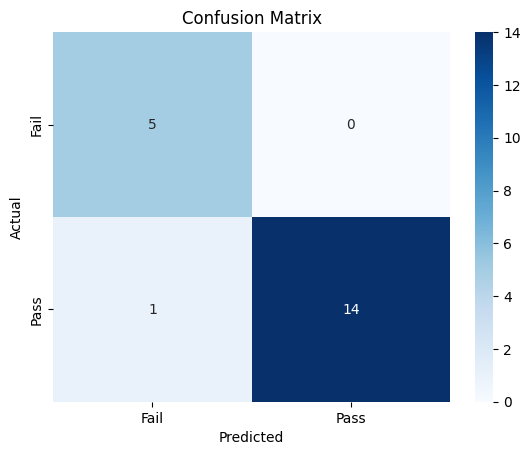

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



# Visualizing the decision boundary based on the NB model

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


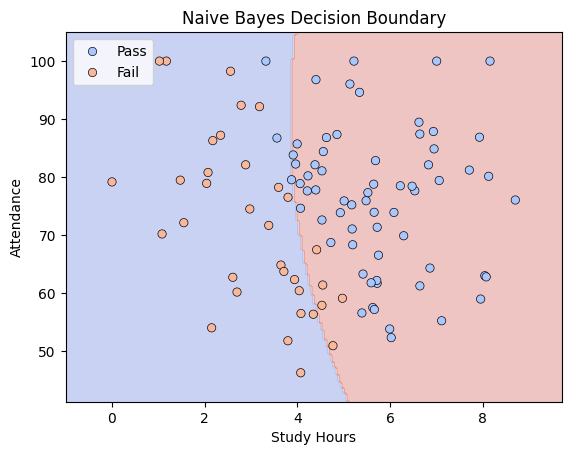

In [ ]:
# Visualization with decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X.iloc[:,0].min()-1, X.iloc[:,0].max()+1
    y_min, y_max = X.iloc[:,1].min()-5, X.iloc[:,1].max()+5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=le.inverse_transform(y),
                    palette='coolwarm', edgecolor='k')
    plt.xlabel('Study Hours')
    plt.ylabel('Attendance')
    plt.title('Naive Bayes Decision Boundary')
    plt.show()

plot_decision_boundary(nb, X, y_encoded)




#Manual validation

In [ ]:
# Manual Validation
sample = np.array([[6, 80]])  # 6 hours study, 80% attendance
probs = nb.predict_proba(sample)
pred_class = le.inverse_transform(nb.predict(sample))

print("\nManual Check:")
print("Probabilities (Fail, Pass):", probs)
print("Predicted Class:", pred_class)


Manual Check:
Probabilities (Fail, Pass): [[0.02686195 0.97313805]]
Predicted Class: ['Pass']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
